## Intro:

In this Notebook we run through a simple example of how to use `rendseq` for peak calling, demoing both HMM peak fitting and a simple thresholding approach, on some raw reads stored in wig format.  This is just intended to give a high level view of the API.  For more detailed examples of how to use both peak calling approaches (ie what parameters are available to you and how you should use them, please [check out our docs](https://rendseq.readthedocs.io/en/latest/#)) and keep an eye out for a more updated demo soon!

###### 1 - Load data

In `rendseq.file_funcs` we have some functions for opening/creating relevant files. We will use that to extract our raw reads from the wig file.   

In [1]:
from rendseq.file_funcs import open_wig

example_wig = './Example_Data/example_wig_Jean_5f_subset.wig' 
reads, chrom = open_wig(example_wig)

######  2 - Z-score transform the raw data

Both our peak finding algorithms require that the raw data is z-score transformed first.  (We actually use a modified z score).  So before finding peaks we will z-score transform our data.   You will find the function to do this in `rendseq.zscores`.  Read more about options for calculating the z_socres [here](https://rendseq.readthedocs.io/en/latest/#module-rendseq.zscores)

In [2]:
from rendseq.zscores import z_scores

z_score_transformed_data = z_scores(reads)

######  3 Fit some peaks!

Now that we have z_score transformed data, we can find our peaks.  We will do this using two approaches - `thresh` - which we will use to automatically calculate our threshold and the call our peaks, and `hmm` which will use a [Hidden Markov Model](https://en.wikipedia.org/wiki/Hidden_Markov_model) to annotate our sequence with peaks. Two Notes
- Using `hmm_peaks` will result in a message being printed stating how many peaks were found. 
- Using the `thresh_peaks` will generate a figure to give us a sense of where the threshold was drawn, and how many obeserved/expected positions had a z score of that value or higher.

Finding Peaks
Calculating Transition Matrix
Found 113 Peaks


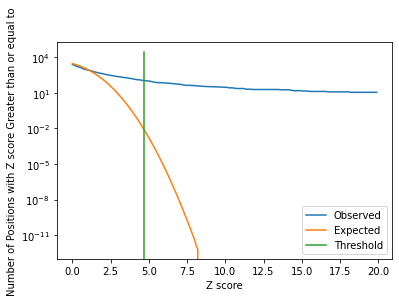

In [3]:
from rendseq.make_peaks import hmm_peaks, thresh_peaks

hmm_peaks_found = hmm_peaks(z_score_transformed_data)
thresh_peaks_found = thresh_peaks(z_score_transformed_data)

######  4 Save peaks to a wig

Now that we have found our peaks the last thing which remains is to save the peaks into a wig file, for further analysis or to check out in your favorite genome browser. (We like [MochiView](http://www.johnsonlab.ucsf.edu/mochiview-downloads) and [IGV](https://software.broadinstitute.org/software/igv/)).  The functions to write wigs also live in `rendseq.file_funcs`

In [4]:
from rendseq.file_funcs import write_wig

#come up with some names for our wig
hmm_wig_name = './Example_Data/example_wig_hmm_peaks.wig'
thresh_wig_name = './Example_Data/example_wig_thresh_peaks.wig'

# write wigs, pass in chrom to use (we got chrom from read_wig)
write_wig(hmm_peaks_found, hmm_wig_name, chrom)
write_wig(thresh_peaks_found, thresh_wig_name, chrom)

######  5 All together now:

Lets look at how this would look all together for both the hmm example and the thresh example (a seperate cell for each) 

In [5]:
from rendseq.file_funcs import open_wig, write_wig
from rendseq.zscores import z_scores
from rendseq.make_peaks import hmm_peaks

example_wig = './Example_Data/example_wig_Jean_5f_subset.wig' 
reads, chrom = open_wig(example_wig)
z_score_transformed_data = z_scores(reads)
hmm_peaks_found = hmm_peaks(z_score_transformed_data)
hmm_wig_name = './Example_Data/example_wig_hmm_peaks.wig'
write_wig(hmm_peaks_found, hmm_wig_name, chrom)

Finding Peaks
Calculating Transition Matrix
Found 113 Peaks


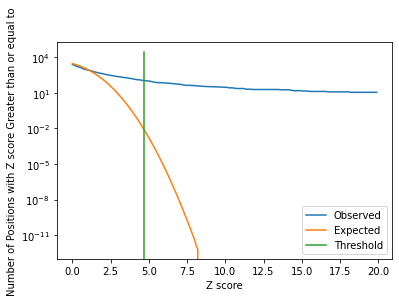

In [6]:
from rendseq.file_funcs import open_wig, write_wig
from rendseq.zscores import z_scores
from rendseq.make_peaks import thresh_peaks

example_wig = './Example_Data/example_wig_Jean_5f_subset.wig' 
reads, chrom = open_wig(example_wig)
z_score_transformed_data = z_scores(reads)
thresh_peaks_found = thresh_peaks(z_score_transformed_data)
thresh_wig_name = './Example_Data/example_wig_thresh_peaks.wig'
write_wig(thresh_peaks_found, thresh_wig_name, chrom)